----
---

# Simulating Network Diffusion With NDlib
 <span><img src=attachment:image.png   align='middle'/></span>
----
---


[**NDlib**](https://ndlib.readthedocs.io/en/latest/overview.html) is a Python language software package for the describing, simulate, and study diffusion processes on complex networks.
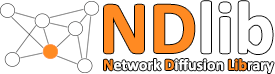

NDlib is built upon the `NetworkX ` python library and is intended to provide:

- tools for the study diffusion dynamics on social, biological, and infrastructure networks,
- a standard programming interface and diffusion models 
- implementation that is suitable for many applications,
a rapid development environment for collaborative, multidisciplinary, projects.

## The SI Model 
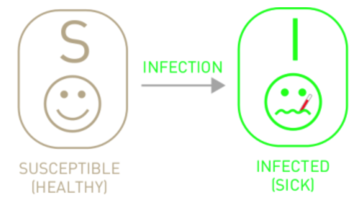

$$\frac{dS}{dt} = -\beta S I$$

$$\frac{dI}{dt} = \beta S I$$

Given every individual in the system must be either susceptible or infected, $I + S = 1$. Thus, the equations above can be transformed to:

$$\frac{dI}{dt} = \beta I (1-I)$$



To solve this differential equation, we can get the cumulative growth curve as a function of time:

$$I_{t} = \frac{x_0 e^{\beta t}}{1-x_0 + x_0 e^{\beta t}}$$

Interestingly, this is a logistic growth featured by its S-shaped curve. The curve grows exponentially shortly after the system is infected, and then saturates as the number of susceptible shrinks which makes it harder to find the next victims. 

In [41]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt


In [58]:
# Integrate a system of ordinary differential equations.
# Solves the initial value problem for stiff or non-stiff systems
# of first order ode-s::
# dy/dt = func(y, t, ...)  [or func(t, y, ...)]
spi.odeint?


In [59]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0
# I_0为感染者的初始人数
I_0 = 1
# S_0为易感者的初始人数
S_0 = N - I_0
# T为传播时间
T = 150

In [60]:
def funcSI(inivalue,_):
    Y = np.zeros(2)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[1]) / N + gamma * X[1]
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

# INI为初始状态下的数组
INI = (S_0,I_0)
T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSI,INI,T_range)


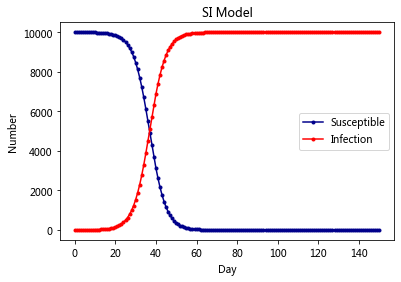

In [61]:
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SI Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## The SIS Model

Another extension of the SI model is the one that allows for reinfection. 

$$\frac{dS}{dt} =\gamma I -\beta S I$$

$$\frac{dI}{dt} = \beta S I - \gamma I$$


Given S + I = 1, the differential equations have the solution:

$$I_t = (1- \frac{\gamma}{\beta})\frac{C e^{(\beta-\gamma)t}}{1+C e^{(\beta-\gamma)t}})$$

The constant $C = \frac{\beta x_0}{\beta - \gamma - \beta x_0}$

In [28]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0.05
# I_0为感染者的初始人数
I_0 = 1
# S_0为易感者的初始人数
S_0 = N - I_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,I_0)

In [29]:
def funcSIS(inivalue,_):
    Y = np.zeros(2)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0]) / N * X[1] + gamma * X[1]
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIS,INI,T_range)

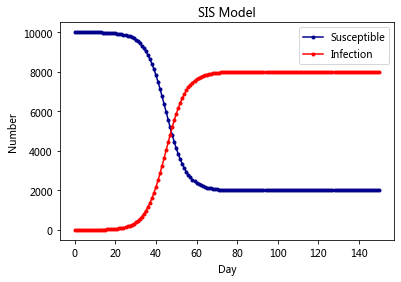

In [30]:
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SIS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## The SIR Model 

For many diseases, there is usually a status of recovery denoted by $R$. Let $\gamma$ denote the removal or recovery rate.

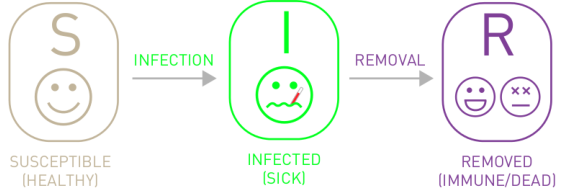




$$\frac{dS}{dt} = -\beta S I$$

$$\frac{dI}{dt} = \beta S I - \gamma I$$

$$\frac{dR}{dt} =  \gamma I$$

However, the differential equations above could not be analytically solved.

In [31]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0.05
# I_0为感染者的初始人数
I_0 = 1
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - R_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,I_0,R_0)

In [32]:
def funcSIR(inivalue,_):
    Y = np.zeros(3)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[1]) / N
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    # 治愈个体变化
    Y[2] = gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIR,INI,T_range)

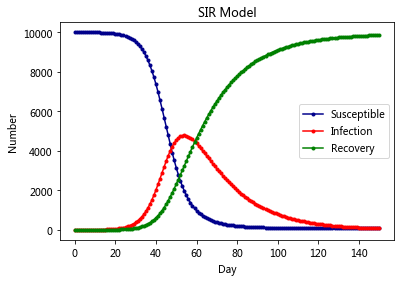

In [33]:
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green',label = 'Recovery',marker = '.')
plt.title('SIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## The SEIR Model

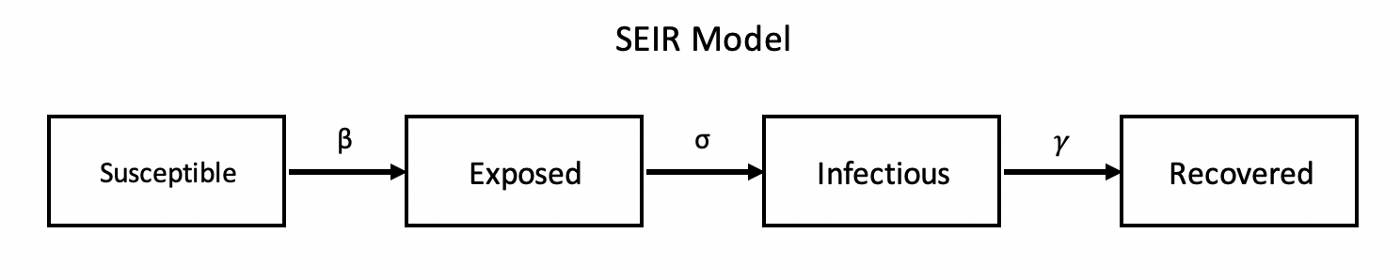

In [34]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.6
# gamma为恢复率系数
gamma = 0.1
# Te为疾病潜伏期
Te = 14
# I_0为感染者的初始人数
I_0 = 1
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 150

In [35]:
# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)
def funcSEIR(inivalue,_):
    Y = np.zeros(4)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[2]) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] * X[2]) / N - X[1] / Te
    # 感染个体变化
    Y[2] = X[1] / Te - gamma * X[2]
    # 治愈个体变化
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSEIR,INI,T_range)

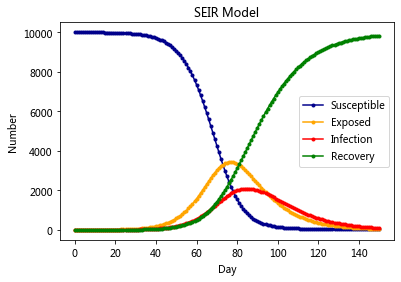

In [36]:
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## The SEIRS Model

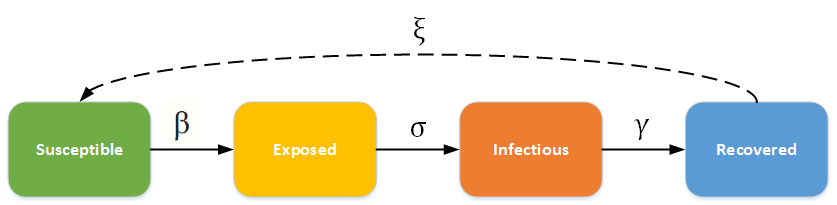


In [37]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.6
# gamma为恢复率系数
gamma = 0.1
# Ts为抗体持续时间
Ts = 7
# Te为疾病潜伏期
Te = 14
# I_0为感染者的初始人数
I_0 = 1
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 150

In [38]:
# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)


def funcSEIRS(inivalue,_):
    Y = np.zeros(4)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[2]) / N + X[3] / Ts
    # 潜伏个体变化
    Y[1] = (beta * X[0] * X[2]) / N - X[1] / Te
    # 感染个体变化
    Y[2] = X[1] / Te - gamma * X[2]
    # 治愈个体变化
    Y[3] = gamma * X[2] - X[3] / Ts
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIRS,INI,T_range)

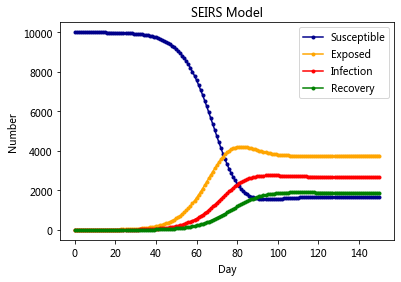

In [39]:
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIRS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

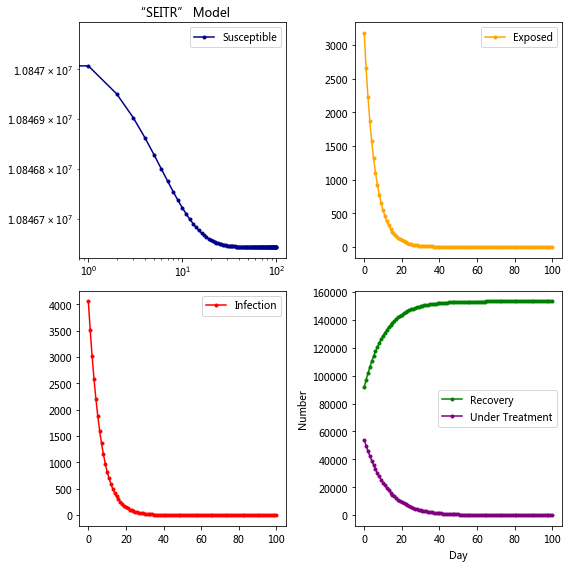

In [57]:
# https://zhuanlan.zhihu.com/p/115869172
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

# N为人群总数
N =11000000
# β为传染率系数
beta = 0.01
# gamma为恢复率系数
gamma = 0.1
#δ为受到治疗系数
δ = 0.3
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 4058
# E_0为潜伏者的初始人数
E_0 = 3178
# R_0为治愈者的初始人数
R_0 = 91750
#T_0为治疗中的初始人数
T_0 = 53941
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 100

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0,T_0)

def funcSEIR(inivalue,_):
    Y = np.zeros(5)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
    # 感染未住院
    Y[2] = X[1] / Te - δ * X[2]
    # 治愈个体变化
    Y[3] = gamma * X[4]
    #治疗中个体变化
    Y[4] = δ* X[2] - gamma* X[4]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)


plt.figure(figsize = [8, 8])

plt.subplot(221)
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('“SEITR” Model')

plt.subplot(222)
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.legend()
plt.subplot(223)
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.legend()
plt.subplot(224)
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.plot(RES[:,4],color = 'purple',label = 'Under Treatment',marker = '.')
plt.legend()


plt.xlabel('Day')
plt.ylabel('Number')
plt.tight_layout()

## Install

In [5]:
pip install ndlib

Note: you may need to restart the kernel to use updated packages.


## Tutorial
https://ndlib.readthedocs.io/en/latest/tutorial.html

In [1]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

<span><img src=attachment:image.png   width = '400px' align='middle'/></span>

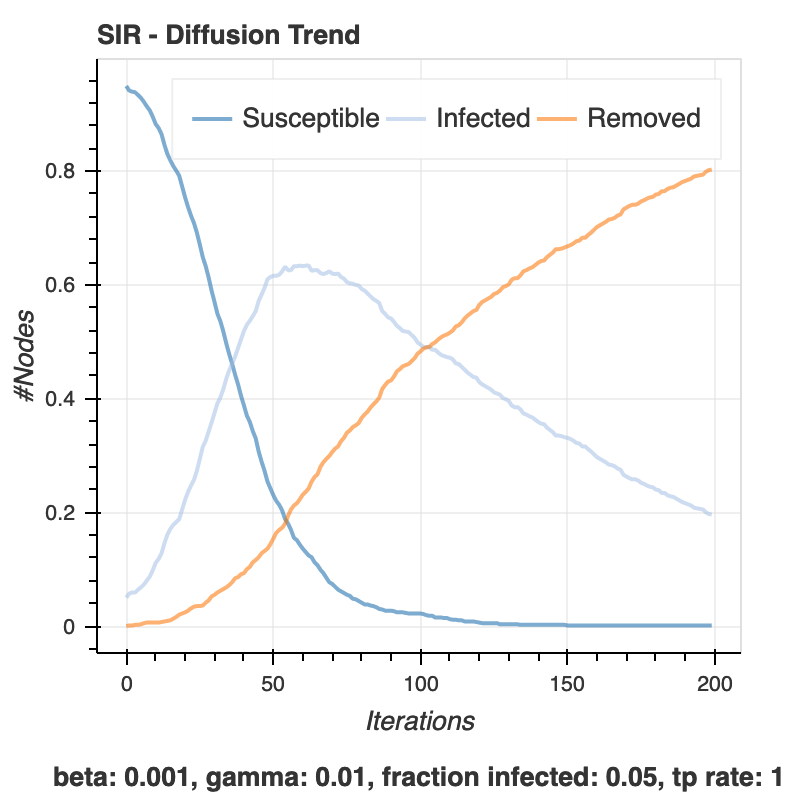

In [2]:
# Network Definition
g = nx.erdos_renyi_graph(1000, 0.1)

# Model Selection
model = ep.SIRModel(g)

In [3]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [4]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:01<00:00, 183.84it/s]


In [6]:
output_notebook() # show bokeh in notebook
viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

Loading BokehJS ...

In [7]:
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

In [8]:
vm = MultiPlot()
vm.add_plot(p)
vm.add_plot(p2)
m = vm.plot()
show(m)

### Kertesz Threshold model

The Kertesz Threshold model was introduced in 2015 by `Ruan` et al. [1] and it is an extension of the Watts threshold model [2].

We set the initial infected as well blocked node sets equals to the 10% of the overall population, assign a threshold of 0.25 to all the nodes and impose an probability of spontaneous adoptions of 40%.

- [1]	Z. Ruan, G. In ̃iguez, M. Karsai, and J. Kertész, “Kinetics of social contagion,” Phys. Rev. Lett., vol. 115, p. 218702, Nov 2015.
- [2]	D.J. Watts, “A simple model of global cascades on random networks,” Proceedings of the National Academy of Sciences, vol. 99, no. 9, pp. 5766–5771, 2002.

In [18]:
# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
th_model = ep.KerteszThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('adopter_rate', 0.4)
config.add_model_parameter('percentage_blocked', 0.1)
config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
threshold = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

th_model.set_initial_status(config)

# Simulation execution
iterations = th_model.iteration_bunch(200)

100%|██████████| 200/200 [00:00<00:00, 207.32it/s]


In [19]:
output_notebook() # show bokeh in notebook

trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p = viz.plot(width=400, height=400)
show(p)

Loading BokehJS ...

In [20]:
viz2 = DiffusionPrevalence(th_model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

### Model Comparisions

In [9]:
# model comparisions
vm = MultiPlot()
vm.add_plot(p)

# SIS
sis_model = ep.SISModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('lambda', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
sis_model.set_initial_status(config)
iterations = sis_model.iteration_bunch(200)
trends = sis_model.build_trends(iterations)

viz = DiffusionTrend(sis_model, trends)
p3 = viz.plot(width=400, height=400)
vm.add_plot(p3)

# SI
si_model = ep.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
si_model.set_initial_status(config)
iterations = si_model.iteration_bunch(200)
trends = si_model.build_trends(iterations)

viz = DiffusionTrend(si_model, trends)
p4 = viz.plot(width=400, height=400)
vm.add_plot(p4)

# Threshold
th_model = ep.ThresholdModel(g)
config = mc.Configuration()

# Set individual node threshold
threshold = 0.40
for n in g.nodes():
    config.add_node_configuration("threshold", n, threshold)

config.add_model_parameter("fraction_infected", 0.30)
th_model.set_initial_status(config)
iterations = th_model.iteration_bunch(60)
trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p5 = viz.plot(width=400, height=400)
vm.add_plot(p5)

m = vm.plot()
show(m)

100%|██████████| 60/60 [00:00<00:00, 94.43it/s] 


# Threshold model
The threshold model was introduced in 1978 by Granovetter [1]. A node has two distinct and mutually exclusive behavioral alternatives, e.g., the decision to do or not do something. Individual decision depends on the percentage of `its neighbors` have made the same choice, thus imposing a threshold.
- each node has its own threshold; 
- during a generic iteration every node is observed: 
    - if the percentage of its infected neighbors is grater than its threshold it becomes infected as well.
    
Granovetter, “Threshold models of collective behavior,” The American Journal of Sociology, vol. 83, no. 6, pp. 1420–1443, 1978.

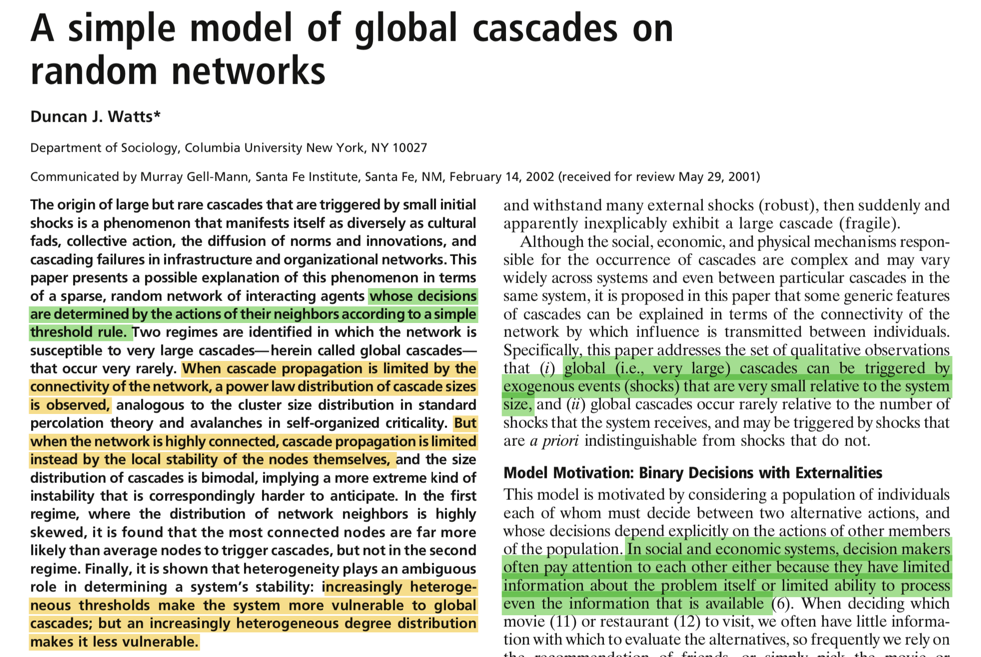

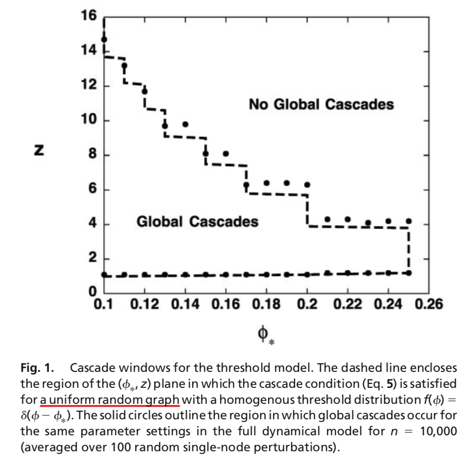

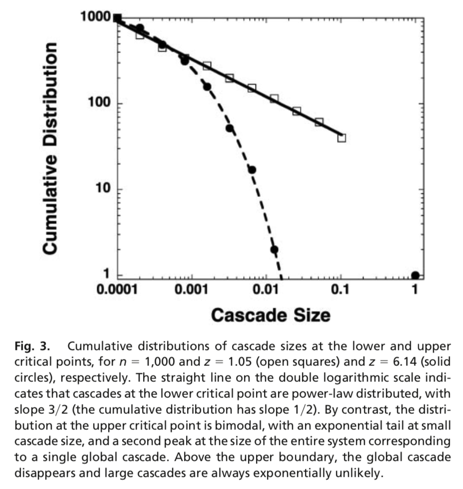

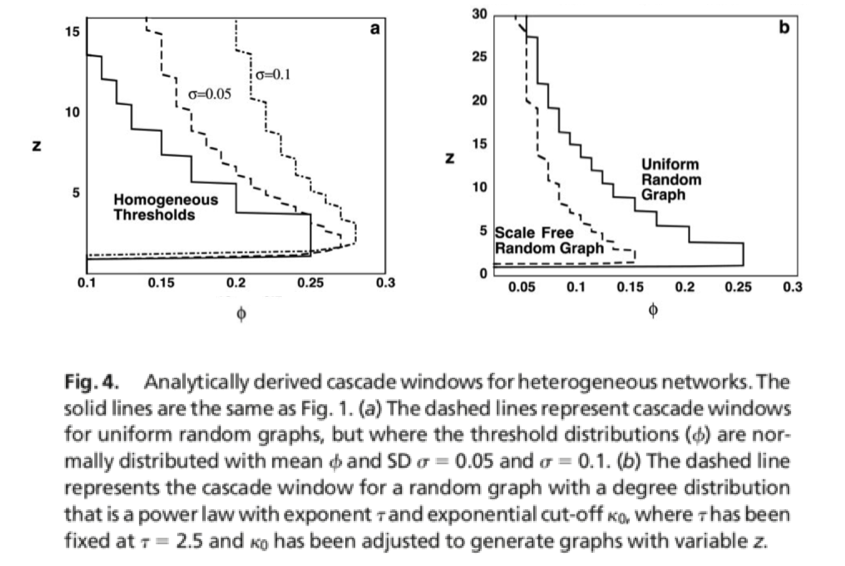

In [16]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

def watts_model_ba_network(m, threshold, fraction_infected, iteration_num):
    # change these two parameters
    # num_neighbors = 1
    # threshold = 0.5
    # fraction_infected = 0.1
    # iteration_num = 30

    # Network topology
    #g = nx.erdos_renyi_graph(1000, 0.1)
    g = nx.barabasi_albert_graph(1000, m)
    # Model selection
    model = ep.ThresholdModel(g)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', fraction_infected)
    # Setting node parameters
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(iteration_num)
    return model, iterations




In [11]:
def plot_diffusion(model, iterations):
    output_notebook() # show bokeh in notebook
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot(width=400, height=400)

    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot(width=400, height=400)

    vm = MultiPlot()
    vm.add_plot(p)
    vm.add_plot(p2)
    m = vm.plot()
    show(m)



In [17]:
model, iterations = watts_model_ba_network(1, 0.5, 0.1, 30)
plot_diffusion(model, iterations)

100%|██████████| 30/30 [00:00<00:00, 465.02it/s]


Loading BokehJS ...

In [18]:
model, iterations = watts_model_ba_network(5, 0.5, 0.1, 30)
plot_diffusion(model, iterations)

100%|██████████| 30/30 [00:00<00:00, 308.63it/s]


Loading BokehJS ...

In [23]:
model, iterations = watts_model_ba_network(2, 0.2, 0.1, 30)
plot_diffusion(model, iterations)

100%|██████████| 30/30 [00:00<00:00, 1237.37it/s]


Loading BokehJS ...

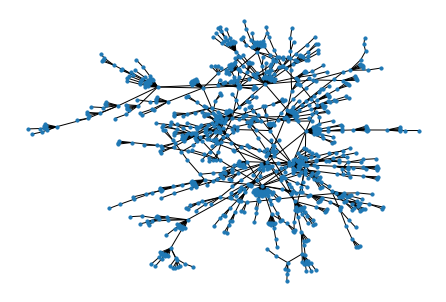

In [3]:
nx.draw(g, node_size = 10)


# General Threshold
The General Threshold model was introduced in 2003 by Kempe [1].

In this model, during an epidemics, a node is allowed to change its status from Susceptible to Infected.

At time t nodes become Infected if the sum of the weight of the infected neighbors is greater than the threshold

- David Kempe , Jon Kleinberg, and Éva Tardos. “Maximizing the spread of influence through a social network.” Proceedings of the ninth ACM SIGKDD international conference on Knowledge discovery and data mining. ACM, 2003.

https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralThreshold.html

# Generalised Threshold
It was introduced in 2017 by Török and Kertesz [1]. In this model, a node is allowed to change its status from Susceptible to Infected. The model is instantiated on a graph having a non-empty set of infected nodes. 

- At time `t` nodes become Infected with rate `mu t/tau`
- Nodes for which the ratio of the active friends dropped below the threshold are moved to the Infected queue
- Nodes in the Infected queue become infected with rate tau. If this happens check all its friends for threshold


> János Török and János Kertész “Cascading collapse of online social networks” Scientific reports, vol. 7 no. 1, 2017 


https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html

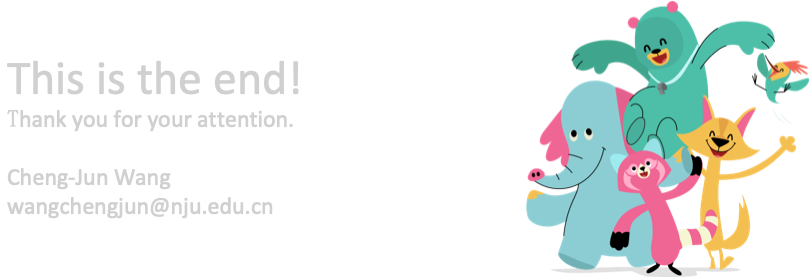